<a href="https://colab.research.google.com/github/Thomas-Fabbris/complessita-sistemi-reti/blob/main/Python/Laboratorio_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Inizializzazione

In [ ]:
!pip install cartopy


In [ ]:
import numpy as np
from collections import namedtuple,defaultdict #Containd in Python STL
import matplotlib.pyplot as plt
import seaborn as sns # For data visualization

import networkx as nx
import cartopy.io.shapereader as shpreader # Read spatial data
import cartopy.crs as ccrs

#Location = namedtuple('Location', ['lon', 'lat'])

In [ ]:
import pandas as pd

In [ ]:
!wget https://piccardi.faculty.polimi.it/VarieCsr/Misc/Laboratorio_networkx.zip

--2026-01-24 10:22:30--  https://piccardi.faculty.polimi.it/VarieCsr/Misc/Laboratorio_networkx.zip
Resolving piccardi.faculty.polimi.it (piccardi.faculty.polimi.it)... 131.175.186.43
Connecting to piccardi.faculty.polimi.it (piccardi.faculty.polimi.it)|131.175.186.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20387977 (19M) [application/zip]
Saving to: ‘Laboratorio_networkx.zip.1’

Laboratorio_network 100%[===================>]  19.44M  68.2MB/s    in 0.3s    

2026-01-24 10:22:31 (68.2 MB/s) - ‘Laboratorio_networkx.zip.1’ saved [20387977/20387977]



In [ ]:
!unzip Laboratorio_networkx.zip

Archive:  Laboratorio_networkx.zip
replace Laboratorio.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Laboratorio.ipynb       
replace __MACOSX/._Laboratorio.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._Laboratorio.ipynb  
replace __MACOSX/._networks? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace __MACOSX/._networks? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._networks     
replace networks/week12_directed.gexf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: networks/week12_directed.gexf  
replace networks/week16_directed.gexf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: networks/week16_directed.gexf  
replace networks/week4_directed.gexf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: networks/week4_directed.gexf  
replace networks/week3_directed.gexf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: networks/week3_directed.gexf  
  inflating: networks/week7_directed.gexf

I file .gexf contengono l'implementazione delle reti

# 1. Caricare le reti di mobilità

Caricare le reti di mobilità Italiana settimanali.
1. Controllare se le reti sono dirette o non, pesate o non pesate <br>
2. Printare numero di nodi, archi e pesi degli archi. <br>
3. Provare a rimuovere dei nodi. <br>
4. Provare a rimuovere degli archi. <br>
5. Mostrare tutti gli archi uscenti/entranti da un nodo. <br>
6. Mostrare tutti i neighbors di un nodo. <br>

Le settimane vanno da 1 a 32 e corrispondono al periodo 24 Febbraio 2020 - 10 Ottobre 2020. <br>
Sono in formato ".gexf" e si possono leggere in networkx con il comando "networkx.read_gexf(path)". <br>

Ref: https://networkx.org/documentation/stable/reference/readwrite/index.html

Questi dati sono stati utilizzati nei seguenti paper per studiare l'impatto del lockdown sulla mobilità:

Bonaccorsi, G., Pierri, F., Cinelli, M., Flori, A., Galeazzi, A., Porcelli, F., W. Quattrociocchi & Pammolli, F. (2020). <b>Economic and social consequences of human mobility restrictions under COVID-19. Proceedings of the National Academy of Sciences, 117(27), 15530-15535.</b>
https://www.pnas.org/content/117/27/15530

Galeazzi, A., Cinelli, M., Bonaccorsi, G., Pierri, F., Schmidt, A.L., Scala, A., Pammolli, F. and Quattrociocchi, W., 2021. <b>Human mobility in response to COVID-19 in France, Italy and UK. Scientific Reports, 11(1), pp.1-10.</b>
https://www.nature.com/articles/s41598-021-99548-7

Bonaccorsi, G., Pierri, F., Scotti, F., Flori, A., Manaresi, F., Ceri, S. and Pammolli, F., 2021. <b>Socioeconomic differences and persistent segregation of Italian territories during COVID-19 pandemic. Scientific Reports, 11(1), pp.1-15.</b>
https://www.nature.com/articles/s41598-021-92399-2

In [ ]:
G = nx.read_gexf("networks/week1_directed.gexf")
# NetworkX (nx) crea un oggetto DiGraph per rappresentare un grafo diretto

In [ ]:
# Estrapolo le informazioni sul grafo
G.is_directed() # Grafo diretto
nx.is_weighted(G) # Grafo pesato

True

In [ ]:
"Milano" in G.nodes
# Controllo la presenza di un nodo nella rete (sintassi dei dizionari in Python)

True

In [ ]:
"Azzano San Paolo" in G.nodes

False

In [ ]:
# Elenco dei nodi della rete
G.nodes

NodeView(('Castel Mella', 'Borgosatollo', 'Firenze', 'Greve in Chianti', 'Vaglia', 'Barberino di Mugello', 'Monteriggioni', 'Fiesole', 'Bagno a Ripoli', 'Scarperia e San Piero', 'Pontassieve', 'Borgo San Lorenzo', 'Bologna', 'Vicchio', 'Cavriglia', 'Figline e Incisa Valdarno', 'Reggello', 'Rufina', 'Terranuova Bracciolini', 'Castelfranco Piandiscò', 'Dicomano', 'Rezzato', 'Arezzo', 'Roma', 'Milano', 'San Benedetto Val di Sambro', 'Marzabotto', 'San Giovanni in Persiceto', 'Ravarino', 'Cento', 'Crevalcore', 'Camposanto', 'Finale Emilia', 'Oppeano', 'Bovolone', 'Belfiore', 'Folgaria', 'Pergine Valsugana', 'Trento', 'Civezzano', 'Caldonazzo', "Sant'Orsola Terme", 'Vignola-Falesina', 'Merano', 'Naturno', 'San Pancrazio', 'Marlengo', 'Lagundo', 'Postal', 'Scena', 'Nalles', 'Appiano sulla Strada del Vino', 'Bolzano', 'San Martino in Passiria', 'Orbetello', 'Magliano in Toscana', 'Scansano', 'Grosseto', 'Campagnatico', 'Sovicille', 'Siena', 'Poggibonsi', "Colle di Val d'Elsa", "Barberino Val 

In [ ]:
G.add_node("Londra")
# Londra non è un comune italiano, lo rimuovo
G.remove_node("Londra")

In [ ]:
G.add_node("Azzano San Paolo")

In [ ]:
G.add_edge("Azzano San Paolo", "Bergamo")
# Se il nodo sorgente/ destinazione non esiste, add_edge lo aggiunge alla rete

In [ ]:
G["Azzano San Paolo"]
G.in_edges("Azzano San Paolo")
G.out_edges("Azzano San Paolo")

OutEdgeDataView([('Azzano San Paolo', 'Bergamo')])

In [ ]:
list(G.neighbors("Azzano San Paolo"))
# Il metodo restituisce un iteratore ai nodi vicini
list(nx.all_neighbors(G,"Azzano San Paolo"))
# Scopro i vicini (sia in entrata che in uscita) di un determinato nodo

['Bergamo']

In [ ]:
# Peso di un arco
G.edges[("Milano","Roma")]["weight"]

436.0

# 2. Calcolare indicatori topologici

Calcolare per ogni rete i seguenti indicatori topologici globali:<br>

1. Numero di nodi <br>
2. Numero di edge <br>
3. Numero di self loops <br>
4. Flusso totale (somma di tutti i pesi su tutti gli archi) <br>
5. Flusso totale escludendo i self loop <br>
6. Numero componenti debolmente connessi <br>
7. Dimensione componente debolmente connesso più grande <br>
8. Densità <br>
9. Dimensione top-5 componenti connesse <br>

Sulla versione non diretta del grafo: <br>

1. Degree medio <br>
2. Strength media <br>
3. Assortatività (non pesata) <br>

e plottare la loro evoluzione nel tempo. Confrontare con le figure presenti negli articoli menzionati sopra
e controllare che siano consistenti.

Ref: https://networkx.org/documentation/stable/reference/introduction.html

In [ ]:
# Resettiamo la rete allo stato iniziale (o la ricarichiamo)
# G = nx.read_gexf("networks/week1_directed.gexf")
G.remove_node("Bergamo")
G.remove_node("Azzano San Paolo")
len(G.nodes), len(G.edges)

(3690, 18960)

In [ ]:
nx.number_of_selfloops(G)

3689

In [ ]:
# Implementazione della funzione precedente
n_self = 0
for city in G.nodes:
  if(city, city) in G.edges:
    n_self += 1
n_self

3689

In [ ]:
flussoTot = sum([v["weight"] for v in G.edges.values()])

In [ ]:
flussoTotNoSelf = sum([v["weight"] for k,v in G.edges.items() if k[0] != k[1]])

In [ ]:
nx.number_weakly_connected_components(G)

1011

In [ ]:
nx.number_strongly_connected_components(G)

1208

In [ ]:
comps = list(nx.weakly_connected_components(G))
# Ordino le componenti per numerosità
comps = sorted(comps,key = len)
# L'ultima componente (con indice -1) sarà la più numerosa per definizione
dimWcc = len(comps[-1])
dimWcc

2473

In [ ]:
np.array([len(c) for c in comps[-5:]])
# Uso gli array di numpy in quanto più comodi da gestire
# np.array[1,2,3,4] + 1

array([   7,   10,   51,   74, 2473])

In [ ]:
nx.density(G)

0.0013928466744683712

In [ ]:
# Trasformo il grafo da diretto a non diretto
Gun = G.to_undirected(G)

In [ ]:
# Il peso degli archi devono essere simmetrici in un grafo non diretto
Gun.edges(["Milano", "Bologna"])

EdgeDataView([('Milano', 'Firenze'), ('Milano', 'Fiesole'), ('Milano', 'Bologna'), ('Milano', 'Roma'), ('Milano', 'Novara'), ('Milano', 'Casorate Sempione'), ('Milano', 'Ferno'), ('Milano', 'Vigevano'), ('Milano', 'Bernate Ticino'), ('Milano', 'Arconate'), ('Milano', 'Busto Arsizio'), ('Milano', 'Cassano Magnago'), ('Milano', 'Ozzero'), ('Milano', 'Santo Stefano Ticino'), ('Milano', 'Parabiago'), ('Milano', 'Castellanza'), ('Milano', 'Carbonate'), ('Milano', 'Cassinetta di Lugagnano'), ('Milano', 'Rosate'), ('Milano', 'Casorate Primo'), ('Milano', 'Bareggio'), ('Milano', 'Lainate'), ('Milano', 'Uboldo'), ('Milano', 'Turate'), ('Milano', 'Cisliano'), ('Milano', 'Corsico'), ('Milano', 'Lentate sul Seveso'), ('Milano', 'Casarile'), ('Milano', 'Zibido San Giacomo'), ('Milano', 'Milano'), ('Milano', 'Bollate'), ('Milano', 'Solaro'), ('Milano', 'Pavia'), ('Milano', 'Pieve Emanuele'), ('Milano', 'Desio'), ('Milano', 'Mariano Comense'), ('Milano', 'Cusano Milanino'), ('Milano', 'Vedano al Lamb

In [ ]:
Gun.edges(["Bologna", "Milano"])

EdgeDataView([('Bologna', 'Firenze'), ('Bologna', 'Fiesole'), ('Bologna', 'Bagno a Ripoli'), ('Bologna', 'Gaggio Montano'), ('Bologna', 'Modena'), ('Bologna', 'Vignola'), ('Bologna', 'San Cesario sul Panaro'), ('Bologna', 'Castelfranco Emilia'), ('Bologna', 'Vergato'), ('Bologna', 'Valsamoggia'), ('Bologna', "Sant'Agata Bolognese"), ('Bologna', 'Ravarino'), ('Bologna', 'San Benedetto Val di Sambro'), ('Bologna', 'Marzabotto'), ('Bologna', 'San Giovanni in Persiceto'), ('Bologna', 'Sasso Marconi'), ('Bologna', 'Zola Predosa'), ('Bologna', "Anzola dell'Emilia"), ('Bologna', 'Bologna'), ('Bologna', 'Calderara di Reno'), ('Bologna', 'Sala Bolognese'), ('Bologna', "Castello d'Argile"), ('Bologna', 'Cento'), ('Bologna', 'Loiano'), ('Bologna', 'Pianoro'), ('Bologna', 'Castel Maggiore'), ('Bologna', 'Bentivoglio'), ('Bologna', 'San Giorgio di Piano'), ('Bologna', "Ozzano dell'Emilia"), ('Bologna', 'Castenaso'), ('Bologna', "Granarolo dell'Emilia"), ('Bologna', 'Minerbio'), ('Bologna', 'Castel 

In [ ]:
# Pandas è una libreria a struttura tabellare, che permette una rapida
# consultazione dei dati
degrees = pd.Series(dict(G.degree))
degrees.sort_values()

,0
Civitaluparella,2
Valle Agricola,2
Locana,2
Germagnano,2
Entracque,2
...,...
Segrate,115
Bologna,122
Torino,170
Roma,180


In [ ]:
meanDegree = degrees.mean()
meanDegree

np.float64(10.276422764227643)

In [ ]:
ass = nx.degree_assortativity_coefficient(Gun)
ass

0.15737476065046388

In [ ]:
def stats(G,week):

  results = dict(week = week)
  results["num_nodes"] = len(G.nodes)
  results["num_edges"] = len(G.edges)
  results["num_self_loops"] = nx.number_of_selfloops(G)
  results["total_flow"] = sum([v["weight"] for v in G.edges.values()])
  results["total_flow_no_self"] = sum([v["weight"] for k,v in G.edges.items() if k[0] != k[1]])
  results["num_wcc"] = nx.number_weakly_connected_components(G)
  results["num_scc"] = nx.number_strongly_connected_components(G)

  comps = list(nx.weakly_connected_components(G))
  comps = sorted(comps,key = len)
  dimWcc = len(comps[-1])
  results["dim_largest_wcc"] = dimWcc

  Gun = G.to_undirected(G)
  degrees = pd.Series(dict(G.degree))
  degrees.sort_values()
  meanDegree = degrees.mean()
  results["dim_mean_degree"] = meanDegree

  return results

In [ ]:
all_results = []
for w in range(1,33):
  G = nx.read_gexf(f"networks/week{w}_directed.gexf")
  all_results.append(stats(G,w))
  print(w) # Stampo il progresso dell'algoritmo

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [ ]:
results_df = pd.DataFrame(all_results) # Creo un dataframe da un dizionario
results_df

,week,num_nodes,num_edges,num_self_loops,total_flow,total_flow_no_self,num_wcc,num_scc,dim_largest_wcc,dim_mean_degree
0,1,3690,18960,3689,64869375.0,7428780.0,1011,1208,2473,10.276423
1,2,3693,18934,3692,65350532.0,7301667.0,1019,1187,2544,10.253994
2,3,3676,16509,3675,67427831.0,4113582.0,1218,1412,1968,8.982046
3,4,3670,12314,3670,67827376.0,2233094.0,1605,1784,1319,6.710627
4,5,3675,10540,3675,67713348.0,1487691.0,1773,2026,793,5.736054
5,6,3679,10440,3679,68882318.0,1566062.0,1775,2011,721,5.675455
6,7,3674,11076,3674,69183184.0,1791809.0,1704,1918,774,6.029396
7,8,3672,11507,3672,68602655.0,1750736.0,1651,1902,989,6.267429
8,9,3675,12276,3675,68157181.0,2181827.0,1592,1812,1057,6.680816
9,10,3674,12668,3674,68166760.0,2244539.0,1529,1751,1328,6.896026


<Axes: xlabel='week'>

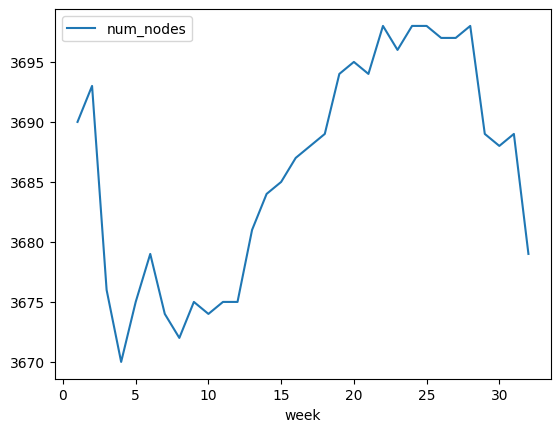

In [ ]:
results_df.plot("week", "num_nodes")

<Axes: xlabel='week'>

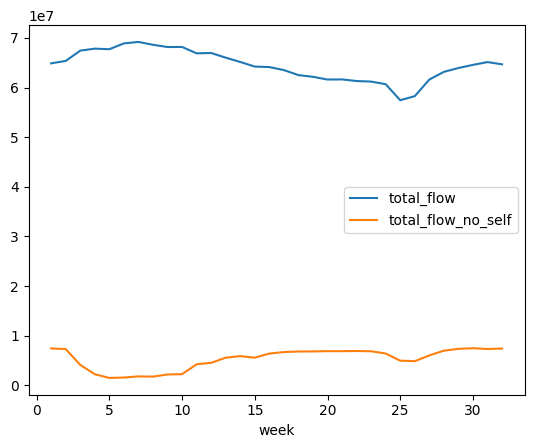

In [ ]:
results_df.plot("week", ["total_flow", "total_flow_no_self"])
# I due dati si trovano su due ordini di grandezza diversi

<Axes: xlabel='week'>

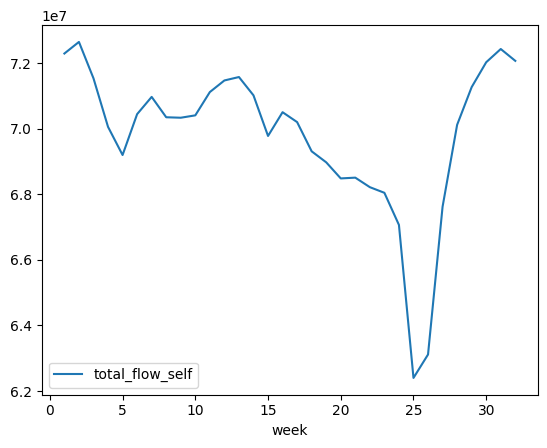

In [ ]:
results_df["total_flow_self"] = results_df["total_flow"] + results_df["total_flow_no_self"]
results_df.plot("week", "total_flow_self")

<Axes: xlabel='week'>

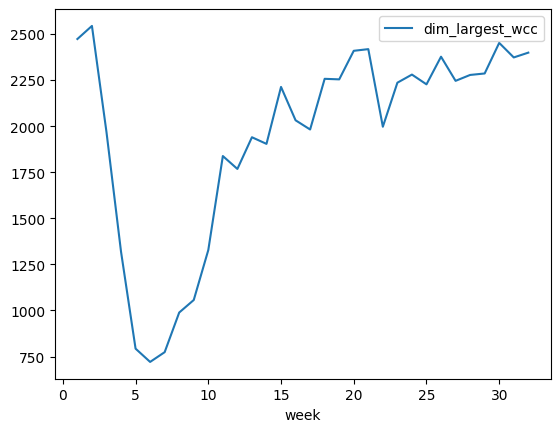

In [ ]:
results_df.plot("week", "dim_largest_wcc")

<Axes: xlabel='week'>

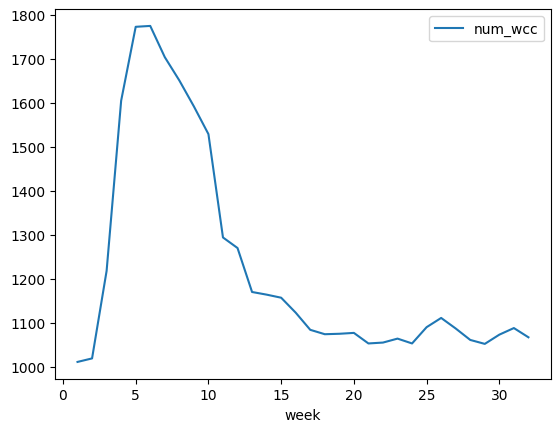

In [ ]:
results_df.plot("week","num_wcc")
# Col passare delle settimane di lockdown, la rete si frammenta

In [ ]:
posDict = {k: (d["lon"], d["lat"]) for k,d in G.nodes.items()}
posDict

{'Montebello della Battaglia': (9.0966796875, 44.99587419175823),
 'Barbianello': (9.184570312499998, 45.057993009008236),
 'Pieve di Soligo': (12.1728515625, 45.92057892267662),
 'Miane': (12.0849609375, 45.92057892267662),
 'Firenze': (11.2060546875, 43.77107698045069),
 'Scandicci': (11.118164062499998, 43.73934366090472),
 'Veduggio con Colzano': (9.2724609375, 45.736851123740365),
 'La Valletta Brianza': (9.3603515625, 45.736851123740365),
 'Malborghetto-Valbruna': (13.4619140625, 46.50845904617523),
 'Gagliole': (13.0517578125, 43.22918670365051),
 'Camerino': (13.0810546875, 43.143734304398414),
 'Como': (9.096679687500002, 45.79816110703561),
 'Guanzate': (9.008789062499998, 45.736851123740365),
 'Scido': (15.952148437499998, 38.23817192702623),
 'Stienta': (11.557617187499998, 44.933687963309936),
 'Canaro': (11.689453125, 44.933687963309936),
 'Villafranca Padovana': (11.821289062499998, 45.49093726745731),
 'Campo San Martino': (11.8212890625, 45.55251682649997),
 'Ascoli Pi

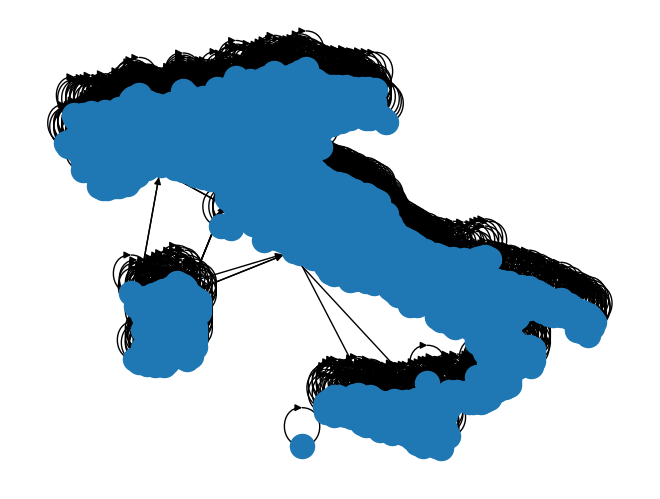

In [ ]:
nx.draw(G,pos=posDict)
# Con un numero di nodi abbastanza elevato, Python impiega del tempo a completare
#l'elaborazione

In [ ]:
nodeSel = np.random.choice(G.nodes,300, replace = False)
Gsub = G.subgraph(nodeSel)
conns = list(nx.strongly_connected_components(Gsub))
# conns = list(nx.weakly_connected_components(Gsub))
conns = sorted(conns,key=len)
Gsubc = G.subgraph(conns[-1])
posDict = {k: (d["lon"], d["lat"]) for k,d in G.nodes.items()}

In [ ]:
len(Gsub.edges)

416

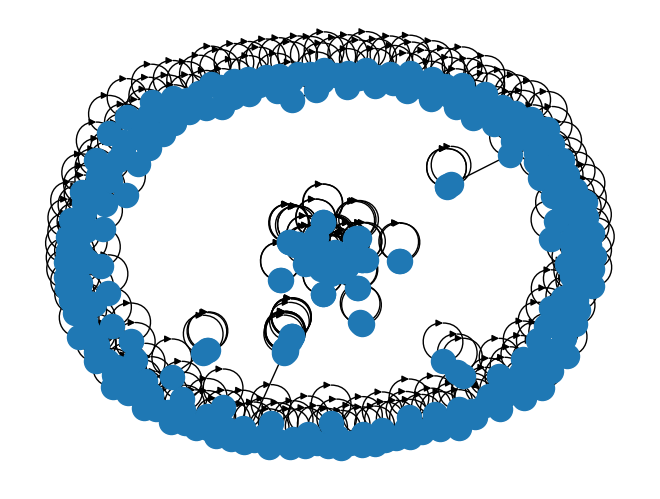

In [ ]:
nx.layout.circular_layout(Gsub)
nx.draw(Gsub) #, pos=posDict, node_size=8)

In [ ]:
len(list(nx.weakly_connected_components(Gsub)))

246

In [ ]:
comps = list(nx.weakly_connected_components(Gsub))
comps = sorted(comps,key = len)
dimWcc = len(comps[-1])
dimWcc

12

In [ ]:
degree = pd.Series(dict(Gsub.degree))

In [ ]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap("viridis")
colors = cmap((degree - degree.min()) / (degree.max() - degree.min()))
colors

array([[0.271828, 0.209303, 0.504434, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       ...,
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.271828, 0.209303, 0.504434, 1.      ]])

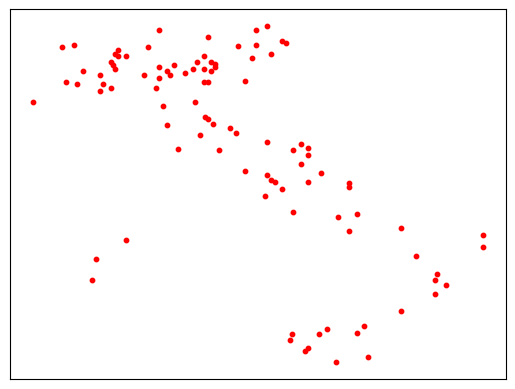

In [ ]:
nx.draw_networkx_nodes(Gsub, pos = posDict, node_size = 10, nodelist = np.random.choice(G.nodes,100,replace = False),node_color="red")

# 3. Plottare la rete di mobilità sulla cartina

1. Utilizzare la prima parte cella sottostante per disegnare la cartina, dopodichè utilizzare networkx per plottare una rete di mobilità usando le funzione "draw_networkx_nodes" e "draw_networkx_edges". <br>
2. Plottare i componenti connessi con colori diversi <br>

Ref: https://networkx.org/documentation/stable/reference/drawing.html

# 4. Utilizzare igraph

(Replicare gli esercizi svolti precedentemente con l'utilizzo di igraph)

1. Controllare se le reti sono dirette o non, pesate o non pesate <br>
2. Printare numero di nodi, archi e pesi degli archi. <br>
3. Provare a rimuovere dei nodi. <br>
4. Provare a rimuovere degli archi. <br>
5. Printare tutti gli archi uscenti/entranti da un nodo. <br>
6. Printare tutti i neighbors di un nodo. <br>

In [ ]:
!pip install igraph

In [ ]:
import igraph

In [ ]:
from igraph import Graph

In [ ]:
gi = Graph(300)

In [ ]:
gi.vs # Accedo ai nodi
len(gi.vs)

300

In [ ]:
len(gi.es)

0

In [ ]:
gi["x"] = [Gsub.nodes[n]["lon"] for n in Gsub]

In [ ]:
gi["x"]

[16.0400390625,
 8.745117187500002,
 9.3603515625,
 14.765625,
 10.502929687499998,
 9.228515625,
 15.1171875,
 8.481445312499998,
 10.415039062499998,
 9.2724609375,
 13.6669921875,
 16.63330078125,
 12.1728515625,
 12.5244140625,
 11.821289062500002,
 13.051757812499998,
 13.2275390625,
 13.9306640625,
 14.8095703125,
 14.018554687500002,
 12.3486328125,
 16.4794921875,
 10.7666015625,
 9.0966796875,
 8.9208984375,
 11.484375,
 15.3369140625,
 14.677734375,
 13.7548828125,
 12.7880859375,
 8.657226562500002,
 12.788085937500002,
 9.0966796875,
 13.5791015625,
 9.4921875,
 16.3916015625,
 8.1298828125,
 8.173828125,
 10.8544921875,
 12.12890625,
 7.9541015625,
 13.051757812499998,
 7.514648437500001,
 10.7666015625,
 14.8974609375,
 9.2724609375,
 11.1181640625,
 10.502929687500002,
 15.161132812499996,
 11.909179687500002,
 12.524414062499998,
 15.336914062500002,
 9.1845703125,
 13.1396484375,
 17.2265625,
 9.887695312500002,
 10.37109375,
 11.9970703125,
 10.5908203125,
 13.7548828

In [ ]:
print(gi.summary())
# U sta per undirected, inoltre viene riportato il numero di nodi, il numero di
# edge e gli attributi dei nodi

IGRAPH U--- 300 0 -- 
+ attr: x (g)


In [ ]:
u = dict(zip(Gsub.nodes, range(len(Gsub.nodes))))

In [ ]:
for e in Gsub.edges:
  gi.add_edge(u[e[0]], u[e[1]])

In [ ]:
print(gi.summary())

IGRAPH U--- 300 416 -- 
+ attr: x (g)


In [ ]:
betw = gi.betweenness()
np.array(betw)
# Le funzioni in iGraph sono implementate in C++, quindi più performanti rispetto a quelle in NetworkX

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.2       ,
        0.        ,  0.        ,  0.        ,  0.5       ,  0.        ,
        0.        ,  0.        ,  2.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.8       ,  0.        ,  0.        ,  0.  